In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv(f"/content/parkinsons_updrs.csv")

In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       subject#    age    sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0        False  False  False      False        False        False      False   
1        False  False  False      False        False        False      False   
2        False  False  False      False        False        False      False   
3        False  False  False      False        False        False      False   
4        False  False  False      False        False        False      False   
...        ...    ...    ...        ...          ...          ...        ...   
5870     False  False  False      False        False        False      False   
5871     False  False  False      False        False        False      False   
5872     False  False  False      False        False        False      False   
5873     False  False  False      False        False        False      False   
5874     False  False  False      False        False        False      False   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0           False       False        False  ...        False         False   
1           False       False        False  ...        False         False   
2           False       False        False  ...        False         False   
3           False       False        False  ...        False         False   
4           False       False        False  ...        False         False   
...           ...         ...          ...  ...          ...           ...   
5870        False       False        False  ...        False         False   
5871        False       False        False  ...        False         False   
5872        False       False        False  ...        False         False   
5873        False       False        False  ...        False         False   
5874        False       False        False  ...        False         False   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA    NHR    HNR   RPDE    DFA  \
0            False          False        False  False  False  False  False   
1            False          False        False  False  False  False  False   
2            False          False        False  False  False  False  False   
3            False          False        False  False  False  False  False   
4            False          False        False  False  False  False  False   
...            ...            ...          ...    ...    ...    ...    ...   
5870         False          False        False  False  False  False  False   
5871         False          False        False  False  False  False  False   
5872         False          False        False  False  False  False  False   
5873         False          False        False  False  False  False  False   
5874         False          False        False  False  False  False  False   

        PPE  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
5870  False  
5871  False  
5872  False  
5873  False  
5874  False  

[5875 rows x 22 columns]>

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

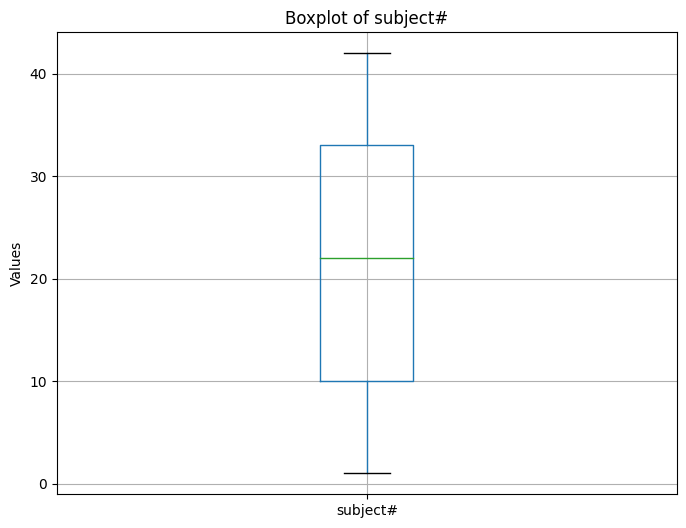

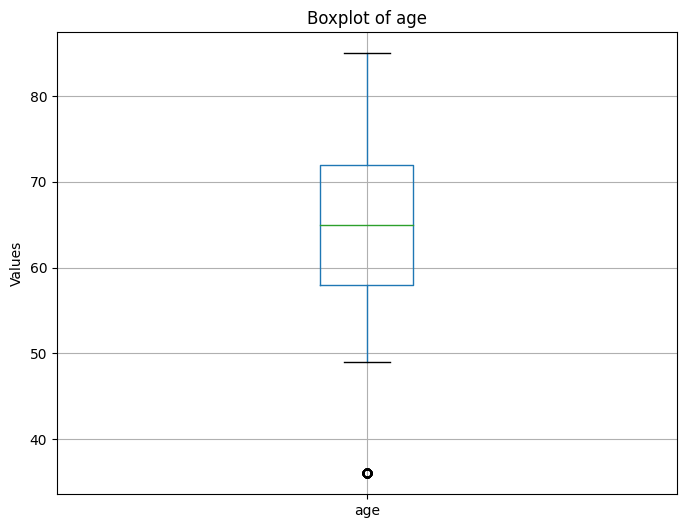

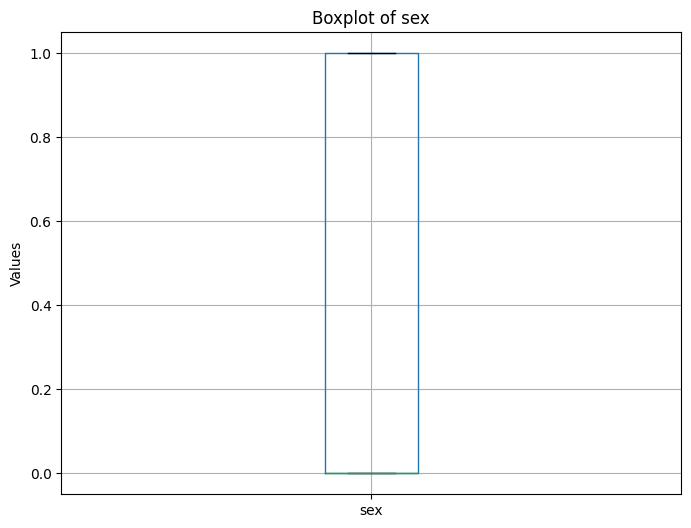

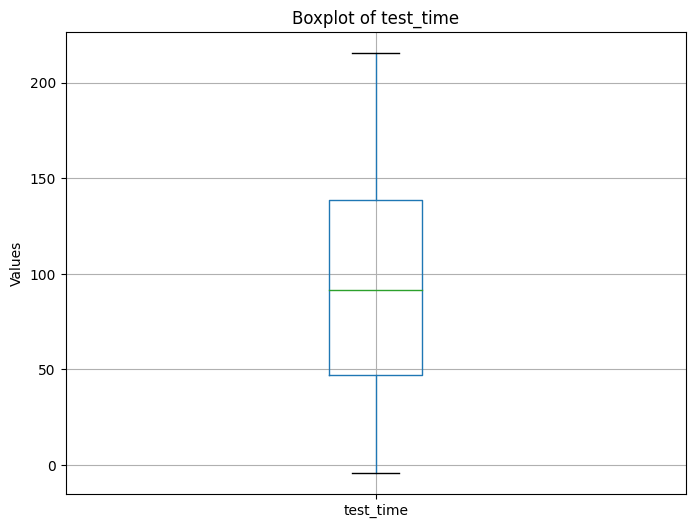

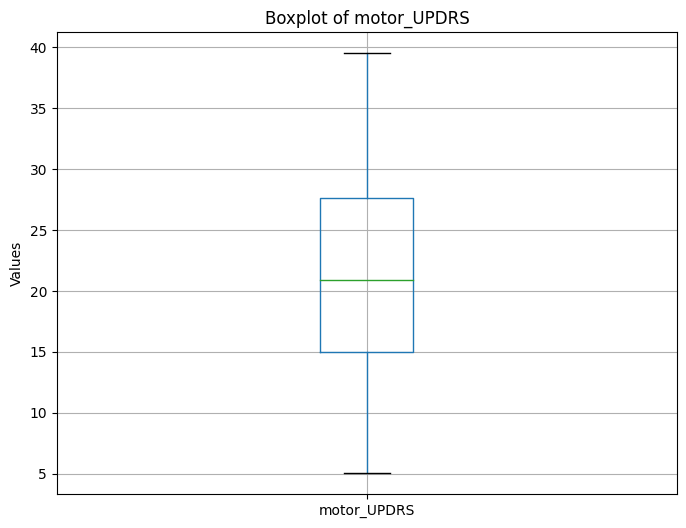

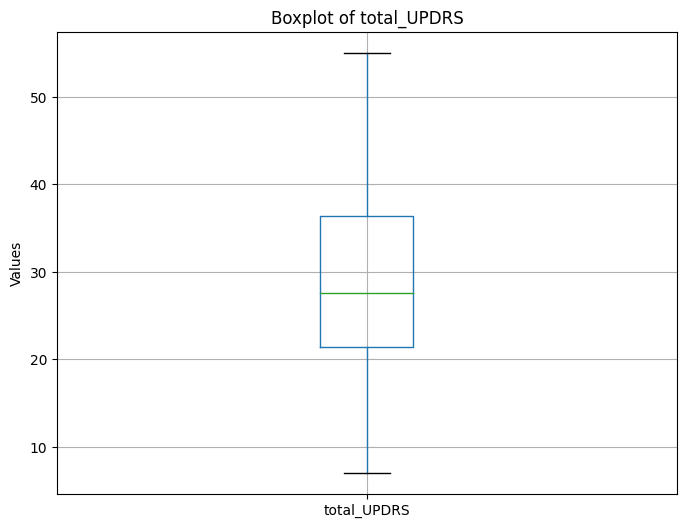

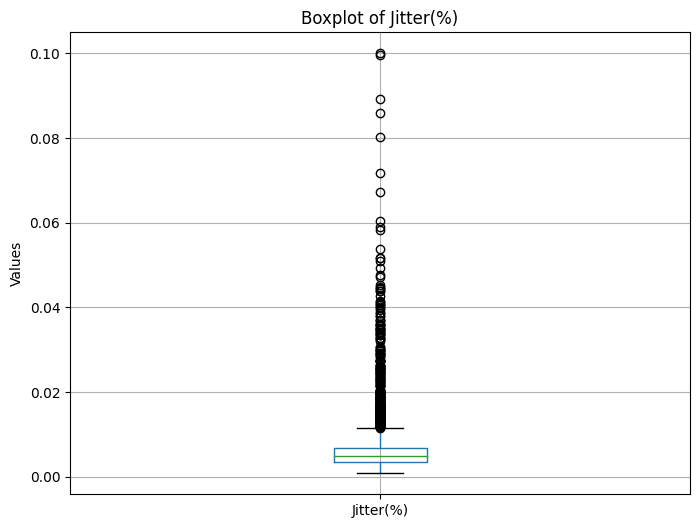

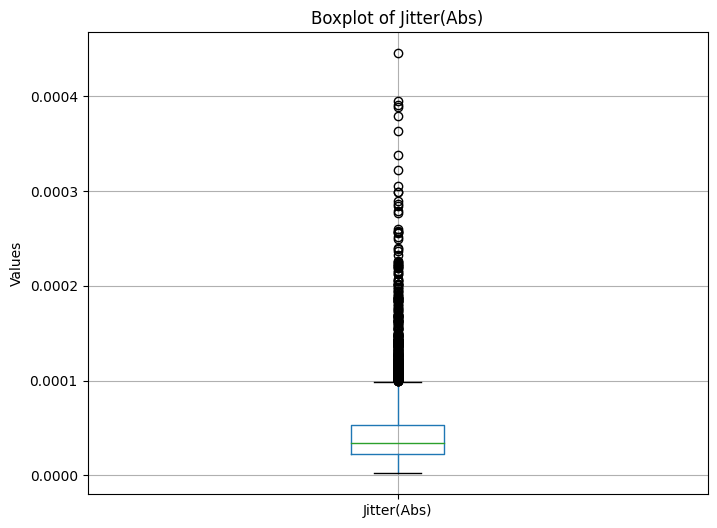

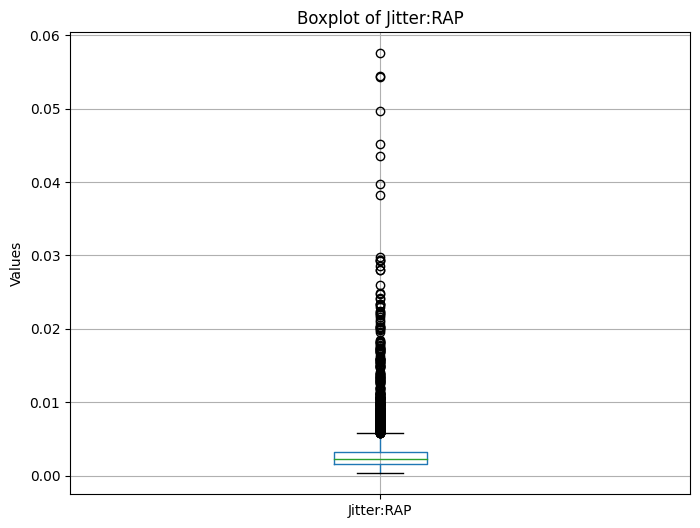

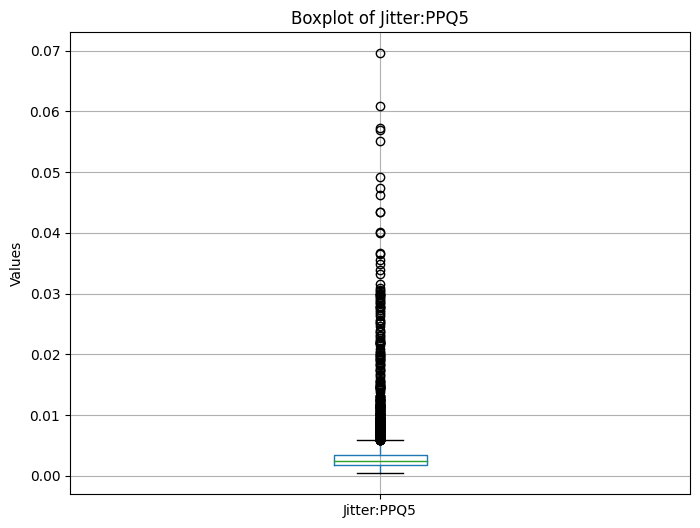

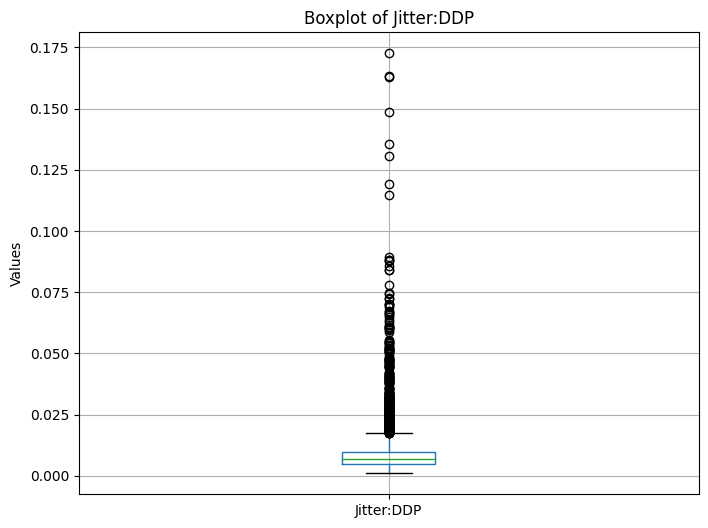

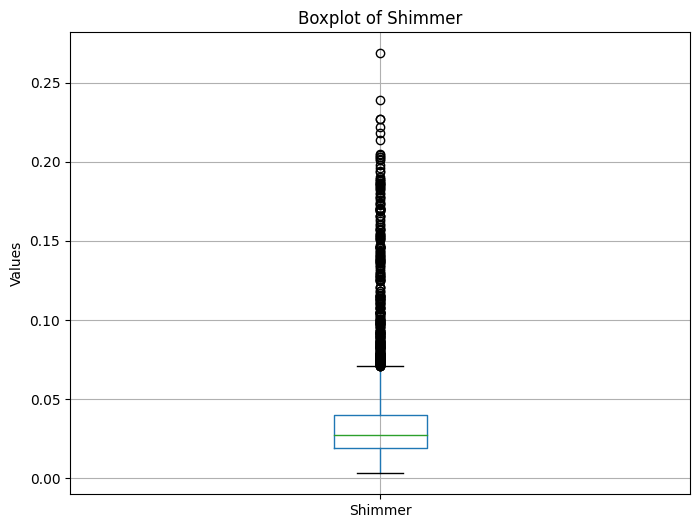

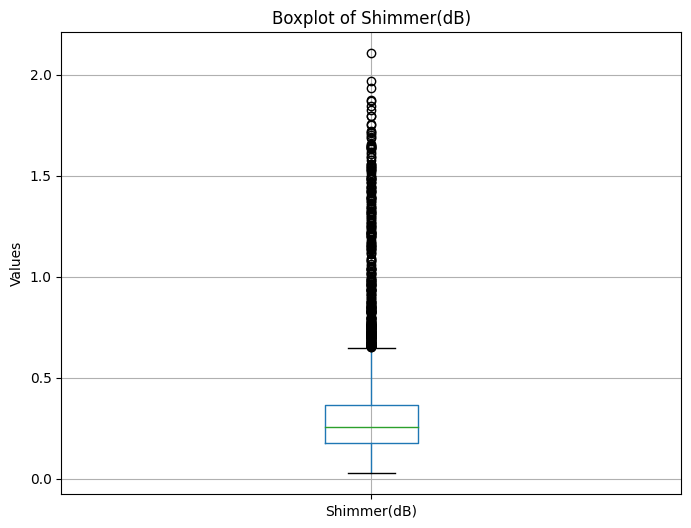

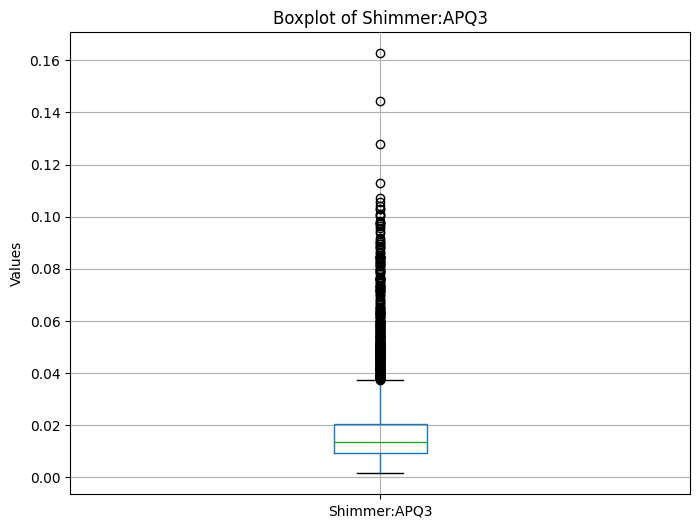

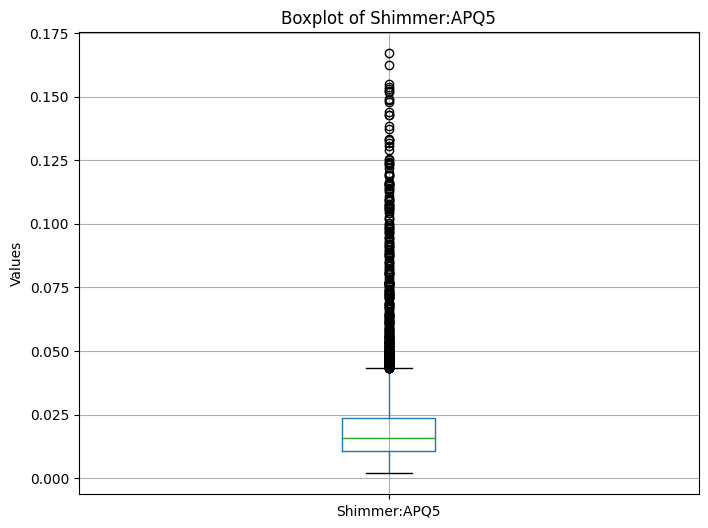

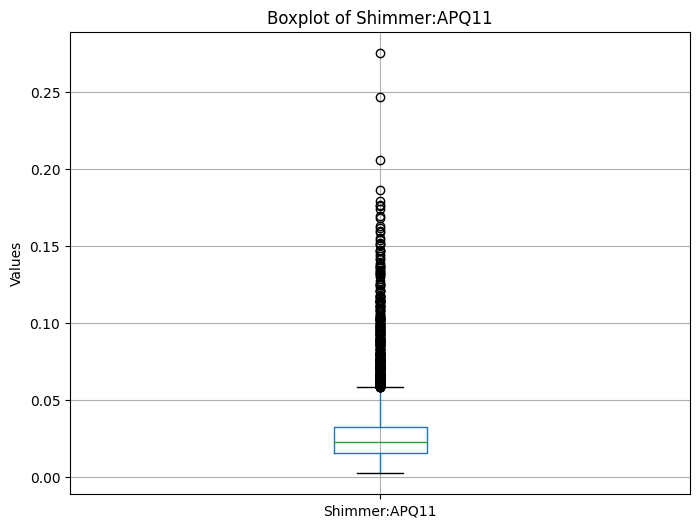

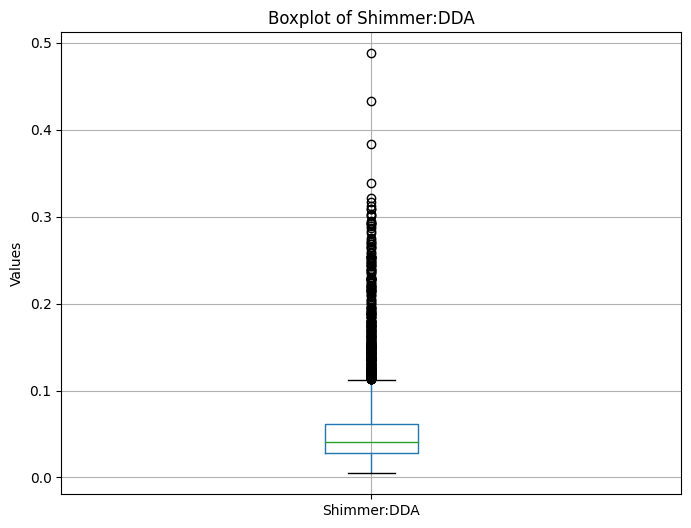

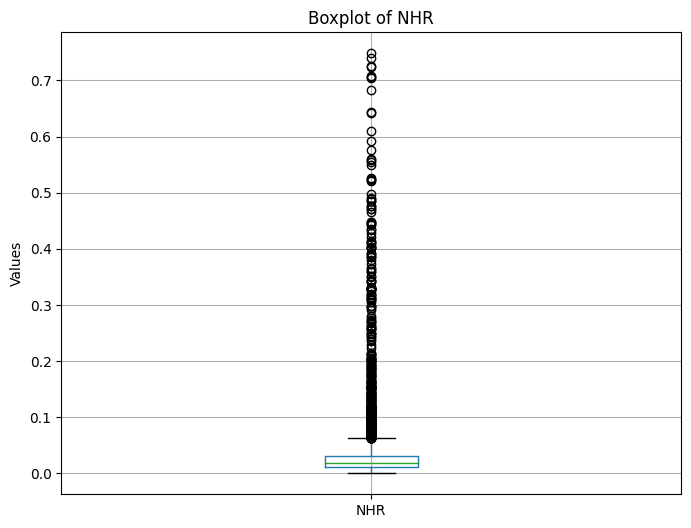

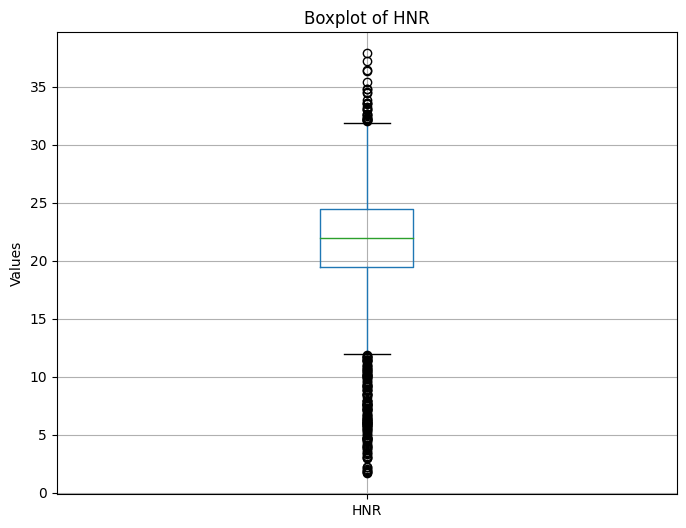

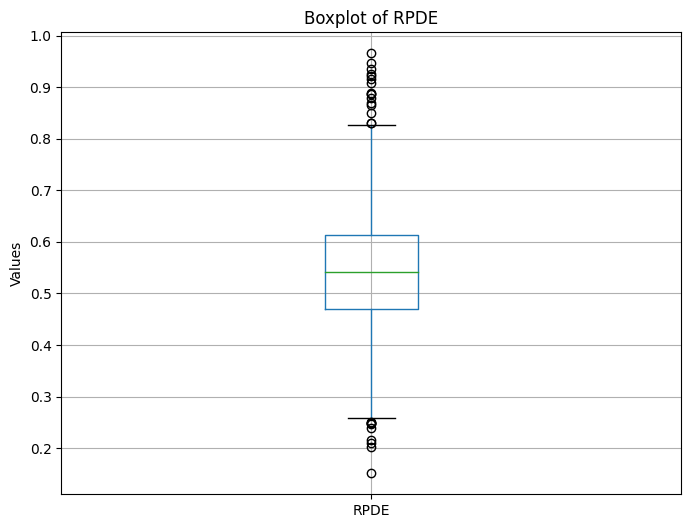

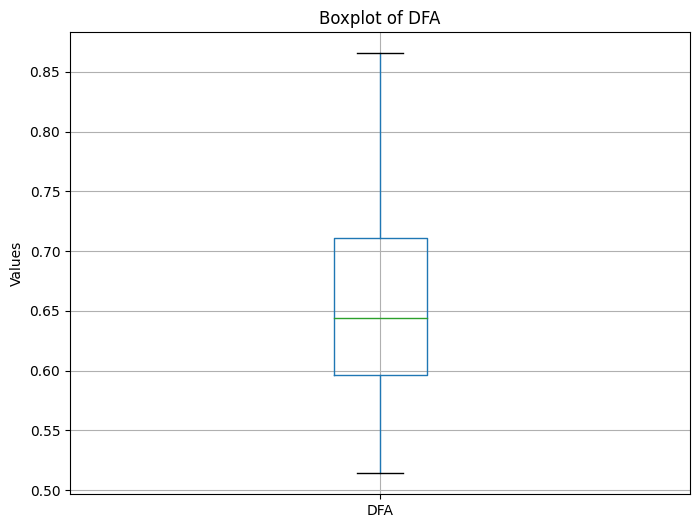

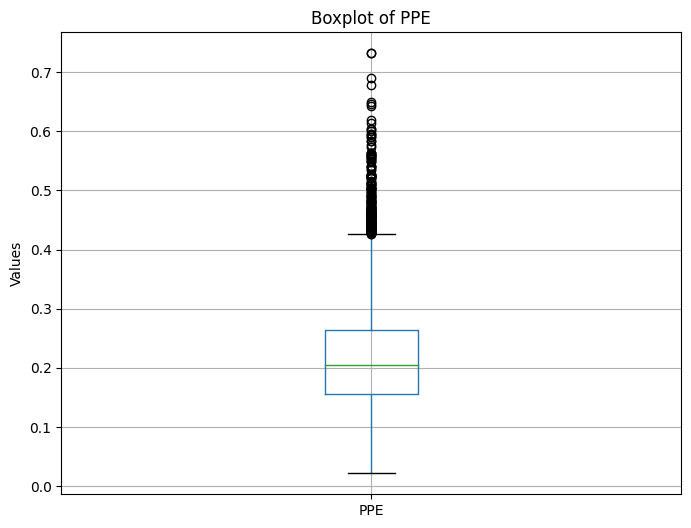

In [ ]:
import seaborn as sns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title('Boxplot of ' + column)
    plt.ylabel('Values')
    plt.show()

In [ ]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

In [ ]:
for column in df.columns:
    df[column] = remove_outliers(df[column])


In [ ]:
X = df.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X_scaled)

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_filled)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

In [ ]:
explained_variance = pca.explained_variance_ratio_

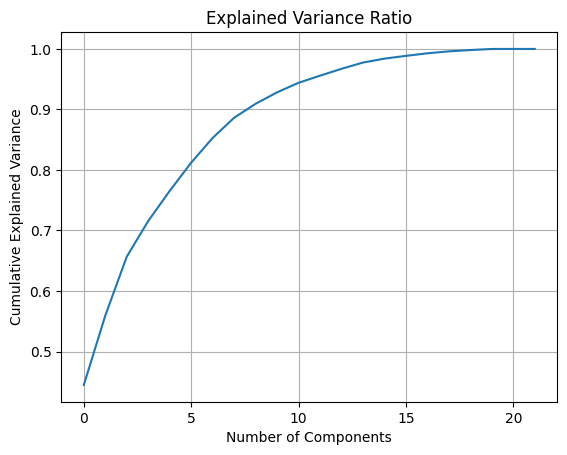

In [ ]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
optimal_n_components = 5

In [ ]:
pca = PCA(n_components=optimal_n_components)

In [ ]:
X_pca_optimal = pca.fit_transform(X_standardized)

In [ ]:
cumulative_variance = np.cumsum(explained_variance)
explained_variance = pca.explained_variance_ratio_

In [ ]:
print("Explained Variance:\n", explained_variance)
print("\nCumulative Variance:\n", cumulative_variance)

Explained Variance:
 [0.44481809 0.1145762  0.09736424 0.05890299 0.04978492]

Cumulative Variance:
 [0.44481809 0.55939428 0.65675852 0.71566151 0.76544643 0.81205381
 0.85297094 0.88626132 0.90936836 0.92822448 0.9440434  0.95579797
 0.96711941 0.97748336 0.98393637 0.98853812 0.99277738 0.995981
 0.9981431  0.99992134 0.99996212 1.        ]


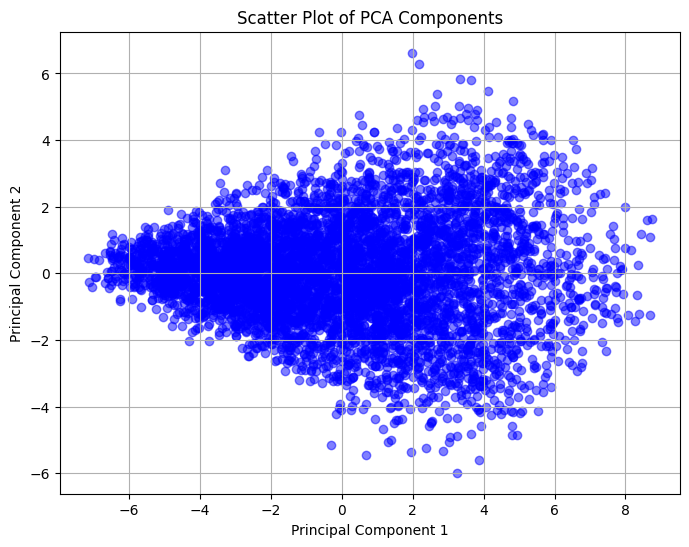

In [ ]:
X_pca_two_components = X_pca[:, :2]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_two_components[:, 0], X_pca_two_components[:, 1], c='blue', alpha=0.5)
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()